Sample Problem:
"If I study more, will I get a higher grade?":

1. **Data Collection**

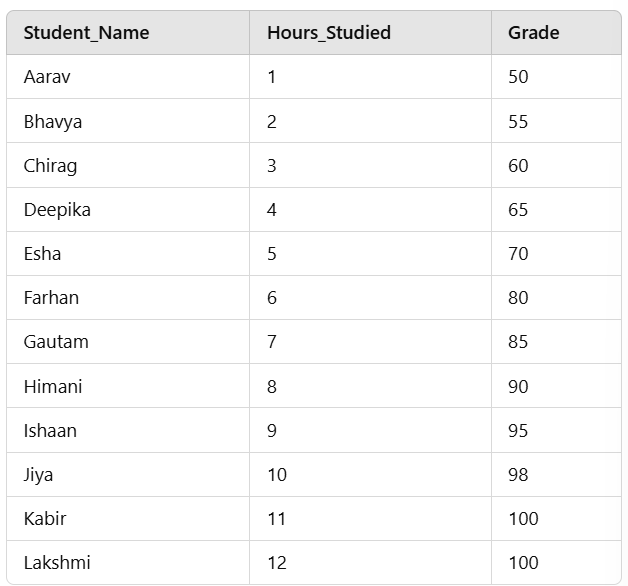

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Sample Data
data = {
    'Student_Name': ['Aarav', 'Bharat', 'Chirag', 'Deepika', 'Esha', 'Farhan', 'Gautam', 'Himani', 'Ishaan', 'Ishita', 'Kabir', 'Lakshmi'],
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'Grade': [50, 55, 60, 65, 70, 80, 85, 90, 95, 98, 100, 110]  # 110 is invalid
}
df = pd.DataFrame(data)
df

,Student_Name,Hours_Studied,Grade
0,Aarav,1,50
1,Bharat,2,55
2,Chirag,3,60
3,Deepika,4,65
4,Esha,5,70
5,Farhan,6,80
6,Gautam,7,85
7,Himani,8,90
8,Ishaan,9,95
9,Ishita,10,98


**Checking for duplicate or missing values**

In [ ]:
missing=df.isnull().sum()
missing

,0
Student_Name,0
Hours_Studied,0
Grade,0


In [ ]:
print("\nRows with Missing Values:\n", df[df.isnull().any(axis=1)])



Rows with Missing Values:
 Empty DataFrame
Columns: [Student_Name, Hours_Studied, Grade]
Index: []


**Adding new data and checking if all values in range**

In [ ]:
data = {
    'Student_Name': ['Aarav', 'Bharat', 'Chirag', 'Deepika', 'Esha', 'Farhan', 'Gautam', 'Himani', 'Ishaan', 'Ishita', 'Kabir', 'Lakshmi', 'Manish', 'Neha'],
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'Grade': [50, 55, 60, 65, 70, 80, 85, 90, 95, 98, 100, 100, 105, 110]  # 110 and 105 are invalid
}
df = pd.DataFrame(data)
df


,Student_Name,Hours_Studied,Grade
0,Aarav,1,50
1,Bharat,2,55
2,Chirag,3,60
3,Deepika,4,65
4,Esha,5,70
5,Farhan,6,80
6,Gautam,7,85
7,Himani,8,90
8,Ishaan,9,95
9,Ishita,10,98


In [ ]:
# Clip Grades to Range [0, 100]
df['Grade'] = df['Grade'].clip(0, 100)
df


,Student_Name,Hours_Studied,Grade
0,Aarav,1,50
1,Bharat,2,55
2,Chirag,3,60
3,Deepika,4,65
4,Esha,5,70
5,Farhan,6,80
6,Gautam,7,85
7,Himani,8,90
8,Ishaan,9,95
9,Ishita,10,98


**EDA**

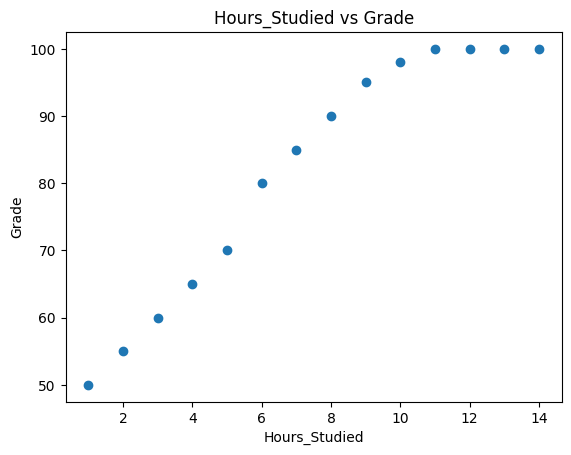

In [ ]:
plt.scatter(df['Hours_Studied'], df['Grade'])
plt.xlabel('Hours_Studied')
plt.ylabel('Grade')
plt.title('Hours_Studied vs Grade')
plt.show()

**Two observations from the plot**

1. Positive Correlation:
The scatter plot shows an upward trend, indicating a positive correlation between the number of hours studied and the grades obtained.
More study hours generally lead to higher grades.

2. Saturation Effect:
After 10+ hours, the improvement in grades almost becomes saturated.



**Machine Learning Model: Linear Regression**

One independent variable and one independent variable showcasing a linear relationship

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
#Many ML models (e.g., LinearRegression in scikit-learn) require 2D input ((n_samples, n_features))
#-1 → Automatically infers the number of rows (samples).
#1 → Specifies one column (one feature).
#This ensures that the model treats X correctly as feature input.
# Convert data to NumPy arrays

X = np.array(df['Hours_Studied']).reshape(-1, 1)
y = np.array(df['Grade'])
# Train Model
model = LinearRegression()
model.fit(X, y)

# Predicted Grade for 5.5 Hours
predicted_grade = model.predict([[5.5]])
print(f"Predicted Grade for 5.5 Hours of Study: {predicted_grade[0]:.2f}")


Predicted Grade for 5.5 Hours of Study: 73.47


**Mathematical relationship is y=mx+c**

**There is a directly proportional or linear relationship btw no of hours studied and grades,more u study,better grades u get**




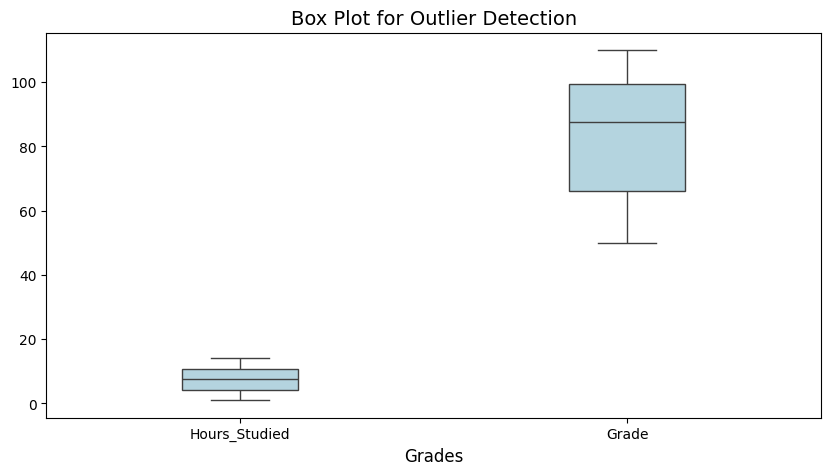

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(data, color="lightblue", width=0.3)
plt.title("Box Plot for Outlier Detection", fontsize=14)
plt.xlabel("Grades", fontsize=12)
plt.show()

**Outliers Checking**

In [ ]:
#solid line: median, dotted line: mean, box represents IQR;Q3-Q1, T-shaped whiaskers are maximum or minimum ranges possible
#anythong outside this is an outlier
Q1=df['Grade'].quantile(0.25)
Q3=df['Grade'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [ ]:
df[df['Grade']<lower_bound]
df[df['Grade']>upper_bound]

,Student_Name,Hours_Studied,Grade
